# Databricks 101 using Python - PySpark

PySpark is an API of Apache Spark which is an open-source, distributed processing system used for big data processing. The Spark has development APIs in Scala, Java, Python, and R, and supports code reuse across multiple workloads — batch processing, interactive queries, real-time analytics, machine learning, and graph processing. It utilizes in-memory caching, and optimized query execution for fast analytic queries against data of any size.

This notebook will give an introduction to PySpark with working examples.

### Introduction to DataFrames in Python
This notebook demonstrates a number of common PySpark DataFrame APIs using Python. \
\
A DataFrame is a two-dimensional labeled data structure with columns of potentially different types. You can think of a DataFrame like a spreadsheet, a SQL table, or a dictionary of series objects.

### Create DataFrames

In [0]:
# import pyspark class Row from module sql
from pyspark.sql import *

# Create Example Data - Departments and Employees

# Create the Departments
department1 = Row(id='123456', name='Computer Science')
department2 = Row(id='789012', name='Mechanical Engineering')
department3 = Row(id='345678', name='Theater and Drama')
department4 = Row(id='901234', name='Indoor Recreation')

In [0]:
# Create the Employees
Employee = Row("firstName", "lastName", "email", "salary")
employee1 = Employee('michael', 'armbrust', 'no-reply@berkeley.edu', 100000)
employee2 = Employee('xiangrui', 'meng', 'no-reply@stanford.edu', 120000)
employee3 = Employee('matei', None, 'no-reply@waterloo.edu', 140000)
employee4 = Employee(None, 'wendell', 'no-reply@berkeley.edu', 160000)
employee5 = Employee('michael', 'jackson', 'no-reply@neverla.nd', 80000)


In [0]:
# Create the DepartmentWithEmployees instances from Departments and Employees
departmentWithEmployees1 = Row(department=department1, employees=[employee1, employee2])
departmentWithEmployees2 = Row(department=department2, employees=[employee3, employee4])
departmentWithEmployees3 = Row(department=department3, employees=[employee5, employee4])
departmentWithEmployees4 = Row(department=department4, employees=[employee2, employee3])


In [0]:
print(department1)
print(employee2)
print(departmentWithEmployees1.employees[0].email)

Row(id='123456', name='Computer Science')
Row(firstName='xiangrui', lastName='meng', email='no-reply@stanford.edu', salary=120000)
no-reply@berkeley.edu

### Create DataFrames from a list of the rows

In [0]:
# creating a list called departmentsWithEmployeesSeq1 using two rows above
# using departmentsWithEmployeesSeq1, create a DataFrame df1 using createDataFrame PySpark API
departmentsWithEmployeesSeq1 = [departmentWithEmployees1, departmentWithEmployees2]
df1 = spark.createDataFrame(departmentsWithEmployeesSeq1)

display(df1)


department,employees
"List(123456, Computer Science)","List(List(michael, armbrust, no-reply@berkeley.edu, 100000), List(xiangrui, meng, no-reply@stanford.edu, 120000))"
"List(789012, Mechanical Engineering)","List(List(matei, null, no-reply@waterloo.edu, 140000), List(null, wendell, no-reply@berkeley.edu, 160000))"


In [0]:
departmentsWithEmployeesSeq2 = [departmentWithEmployees3, departmentWithEmployees4]
df2 = spark.createDataFrame(departmentsWithEmployeesSeq2)

display(df2)

department,employees
"List(345678, Theater and Drama)","List(List(michael, jackson, no-reply@neverla.nd, 80000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(901234, Indoor Recreation)","List(List(xiangrui, meng, no-reply@stanford.edu, 120000), List(matei, null, no-reply@waterloo.edu, 140000))"


### Work with DataFrames

In [0]:
# Union two DataFrames
unionDF = df1.union(df2)
display(unionDF)

department,employees
"List(123456, Computer Science)","List(List(michael, armbrust, no-reply@berkeley.edu, 100000), List(xiangrui, meng, no-reply@stanford.edu, 120000))"
"List(789012, Mechanical Engineering)","List(List(matei, null, no-reply@waterloo.edu, 140000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(345678, Theater and Drama)","List(List(michael, jackson, no-reply@neverla.nd, 80000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(901234, Indoor Recreation)","List(List(xiangrui, meng, no-reply@stanford.edu, 120000), List(matei, null, no-reply@waterloo.edu, 140000))"


In [0]:
# Write the unioned DataFrame to a Parquet file

# Remove the file if it exists
dbutils.fs.rm("/tmp/databricks-df-example.parquet", True)
unionDF.write.parquet("/tmp/databricks-df-example.parquet")


In [0]:
# Read a DataFrame from the Parquet file
parquetDF = spark.read.parquet("/tmp/databricks-df-example.parquet")
display(parquetDF)

department,employees
"List(789012, Mechanical Engineering)","List(List(matei, null, no-reply@waterloo.edu, 140000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(345678, Theater and Drama)","List(List(michael, jackson, no-reply@neverla.nd, 80000), List(null, wendell, no-reply@berkeley.edu, 160000))"
"List(901234, Indoor Recreation)","List(List(xiangrui, meng, no-reply@stanford.edu, 120000), List(matei, null, no-reply@waterloo.edu, 140000))"
"List(123456, Computer Science)","List(List(michael, armbrust, no-reply@berkeley.edu, 100000), List(xiangrui, meng, no-reply@stanford.edu, 120000))"


In Spark, we can use `explode` method to convert single column values into multiple rows. Explode can be used to convert one row into multiple rows in Spark. \

`selectExpr()` takes SQL expression in a String and returns a new DataFrame.

In [0]:
# Explode the employees column
from pyspark.sql.functions import explode

explodeDF = unionDF.select(explode("employees").alias("e"))
flattenDF = explodeDF.selectExpr("e.firstName", "e.lastName", "e.email", "e.salary")

flattenDF.show()

+---------+--------+--------------------+------+
firstName|lastName| email|salary|
+---------+--------+--------------------+------+
 michael|armbrust|no-reply@berkeley...|100000|
 xiangrui| meng|no-reply@stanford...|120000|
 matei| null|no-reply@waterloo...|140000|
 null| wendell|no-reply@berkeley...|160000|
 michael| jackson| no-reply@neverla.nd| 80000|
 null| wendell|no-reply@berkeley...|160000|
 xiangrui| meng|no-reply@stanford...|120000|
 matei| null|no-reply@waterloo...|140000|
+---------+--------+--------------------+------+

Use `filter()` to return the rows that match a condition. This function works similar to SQL's `where` clause.

In [0]:
filterDF = flattenDF.filter(flattenDF.firstName == "xiangrui").sort(flattenDF.lastName)
display(filterDF)

firstName,lastName,email,salary
xiangrui,meng,no-reply@stanford.edu,120000
xiangrui,meng,no-reply@stanford.edu,120000


### Pandas API on Spark

`pandas` is a Python package commonly used by data scientists. However, pandas does not scale out to big data. Pandas API on Spark fills this gap by providing pandas equivalent APIs that work on Apache Spark.

In [0]:
# pip install pyspark-pandas


In [0]:
import numpy as np
import pandas as pd
import pyspark.pandas as ps


--------------------------------------------------------------------------- 
 ModuleNotFoundError Traceback (most recent call last)
 <command-3612964653666264> in <module> 
 1 import numpy as np
 2 import pandas as pd
 ----> 3 import pyspark . pandas as ps

 /databricks/python_shell/dbruntime/PythonPackageImportsInstrumentation/__init__.py in import_patch (name, globals, locals, fromlist, level) 
 156 # Import the desired module. If you’re seeing this while debugging a failed import, 
 157 # look at preceding stack frames for relevant error information. 
 --> 158 original_result = python_builtin_import ( name , globals , locals , fromlist , level ) 
 159 
 160 is_root_import = thread_local . _nest_level == 1 

 ModuleNotFoundError : No module named 'pyspark.pandas'

In [0]:
# Create a pandas Series
pser = pd.Series([1, 3, 5, np.nan, 6, 8]) 
# Create a pandas-on-Spark Series
psser = ps.Series([1, 3, 5, np.nan, 6, 8])
# Create a pandas-on-Spark Series by passing a pandas Series
psser = ps.Series(pser)
psser = ps.from_pandas(pser)

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-2820777183555304> in <module> 
 2 pser = pd . Series ( [ 1 , 3 , 5 , np . nan , 6 , 8 ] ) 
 3 # Create a pandas-on-Spark Series 
 ----> 4 psser = ps . Series ( [ 1 , 3 , 5 , np . nan , 6 , 8 ] ) 
 5 # Create a pandas-on-Spark Series by passing a pandas Series 
 6 psser = ps . Series ( pser ) 

 NameError : name 'ps' is not defined

Pandas API on Spark is available beginning in Apache Spark 3.2 (which is included beginning in Databricks Runtime 10.0). The current version of Databricks on this environment is 9.1 with Apache Spark version 3.1.2 and hence we are not able to using `pandas` library.

### Visualizations
Databricks Python notebooks support various types of visualizations using the display function.

In [0]:
# To plot data in Python, use the display function as follows:
diamonds_df = spark.read.csv("/databricks-datasets/Rdatasets/data-001/csv/ggplot2/diamonds.csv", header="true", inferSchema="true")

display(diamonds_df.groupBy("color").avg("price").orderBy("color"))

color,avg(price)
D,3169.9540959409596
E,3076.7524752475247
F,3724.886396981765
G,3999.135671271697
H,4486.669195568401
I,5091.874953891553
J,5323.81801994302


### Matplotlib
The method for displaying Matplotlib figures depends on which version of Databricks Runtime your cluster is running.

Databricks Runtime 6.5 and above display Matplotlib figures inline.

With Databricks Runtime 6.4 ES, you must call the `%matplotlib inline` magic command.

#### Example 1

In [0]:
# in DBR 6.4 and below, uncomment the line below
# %matplotlib inline


In [0]:
import numpy as np
import matplotlib.pyplot as plt
 

In [0]:
# x axis values 
x = [1,2,3] 
# corresponding y axis values 
y = [2,4,1] 

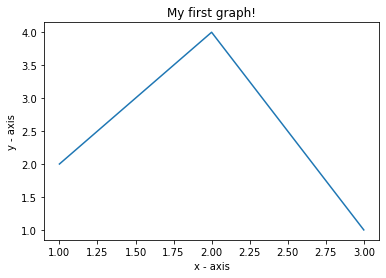

In [0]:
# plotting the points  
plt.plot(x, y) 
    
# naming the x axis 
plt.xlabel('x - axis') 
# naming the y axis 
plt.ylabel('y - axis') 
    
# giving a title to my graph 
plt.title('My first graph!') 
    
# function to show the plot 
plt.show() 

Below steps were followed:
* Define the x-axis and corresponding y-axis values as lists.
* Plot them on canvas using .plot() function.
* Give a name to x-axis and y-axis using .xlabel() and .ylabel() functions.
* Give a title to your plot using .title() function.
* Finally, to view your plot, we use .show() function.

#### Example 2

Python Plotly Library is an open-source library that can be used for data visualization and understanding data simply and easily. Plotly supports various types of plots like line charts, scatter plots, histograms, cox plots, etc.

Below are the factors that make Plotly unique compared to other plotting libraries.
* Plotly has hover tool capabilities that allow users to detect any outliers or anomalies in a large number of data points.
* Endless customization options that makes plots more meaningful and understandable.

Plotly does not come built-in with Python. To install it type the below command in the terminal. Uncomment the below cell to install plotly.

In [0]:
# pip install plotly

In [0]:
import plotly.express as px


In [0]:
 # using the iris dataset
df = px.data.iris()
 
# plotting the bar chart
fig = px.bar(df, x="sepal_width", y="sepal_length")
 
# showing the plot
fig.show()

### References: 
https://docs.databricks.com/spark/latest/dataframes-datasets/introduction-to-dataframes-python.html \
https://docs.databricks.com/languages/python.html